In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.feature_selection import SelectFromModel

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier




In [2]:
# Cargar features
X_train = pd.read_pickle("X_train.pkl")
X_test = pd.read_pickle("X_test.pkl")

# Cargar etiquetas
y_train = pd.read_pickle("y_train.pkl").values.ravel()
y_test = pd.read_pickle("y_test.pkl").values.ravel()

print("✅ Datos cargados correctamente")
print("X_train:", X_train.shape, "| X_test:", X_test.shape)
print("y_train:", len(y_train), "| y_test:", len(y_test))


✅ Datos cargados correctamente
X_train: (982, 29) | X_test: (246, 29)
y_train: 982 | y_test: 246


## Un primer Pipeline con seleccion de variables con random forest

In [ ]:

pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),   # Rellena posibles NaN
    ('scaler', StandardScaler()),                    # Escalado estándar
    ('feature_selection', SelectFromModel(
        RandomForestClassifier(
            n_estimators=300,
            random_state=42,
            n_jobs=-1
        ))),                                          # Selección de variables
    ('model', RandomForestClassifier(
        n_estimators=500,
        random_state=42,
        n_jobs=-1
    ))                                                # Modelo final
])

# Entrenar el pipeline
pipe.fit(X_train, y_train)

# Evaluar en test
y_pred = pipe.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {acc:.3f}")
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))

# Matriz de confusión
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), cbar=False,cmap='viridis', annot=False, fmt='d')
plt.title("Matriz de Confusión - Pipeline RF + Selección de Variables")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()


Exactitud del modelo: 0.813

Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.67      1.00      0.80         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           6       0.00      0.00      0.00         0
           7       0.67      0.67      0.67         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00  

c:\Documents\anaconda\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Documents\anaconda\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Documents\anaconda\envs\ml_env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Docume

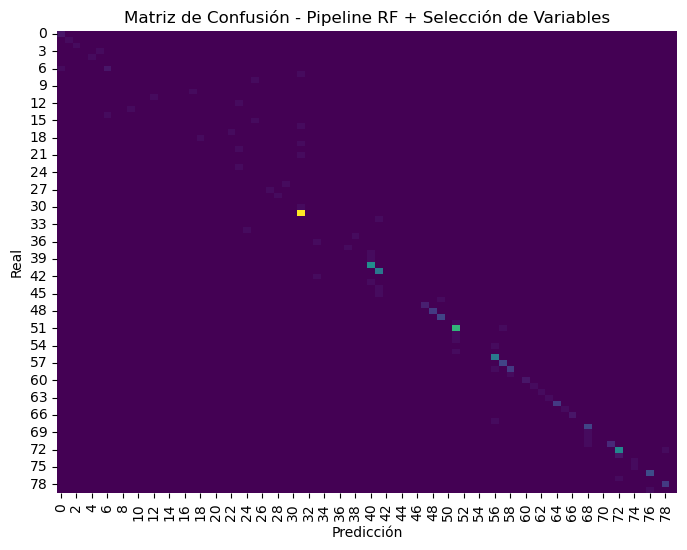

### MULTI-PIPELINE: Con PCA y otros modelos


Evaluación rápida → pca_svc


c:\Documents\anaconda\envs\ml_env\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


CV acc:   0.441 ± 0.013
Test acc: 0.455

Reporte de clasificación (test):
               precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
      

c:\Documents\anaconda\envs\ml_env\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


CV acc:   0.477 ± 0.024
Test acc: 0.463

Reporte de clasificación (test):
               precision    recall  f1-score   support

           1       0.50      0.50      0.50         2
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         1
           7       0.50      0.33      0.40         3
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
      

c:\Documents\anaconda\envs\ml_env\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Documents\anaconda\envs\ml_env\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


CV acc:   0.764 ± 0.030
Test acc: 0.776

Reporte de clasificación (test):
               precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       0.00      0.00      0.00         1
          18       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         0
          20       1.00      1.00      1.00         1
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       1.00      1.00      1.00         1
      

c:\Documents\anaconda\envs\ml_env\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


CV acc:   0.552 ± 0.012
Test acc: 0.569

Reporte de clasificación (test):
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.33      1.00      0.50         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           7       0.40      0.67      0.50         3
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         0
      

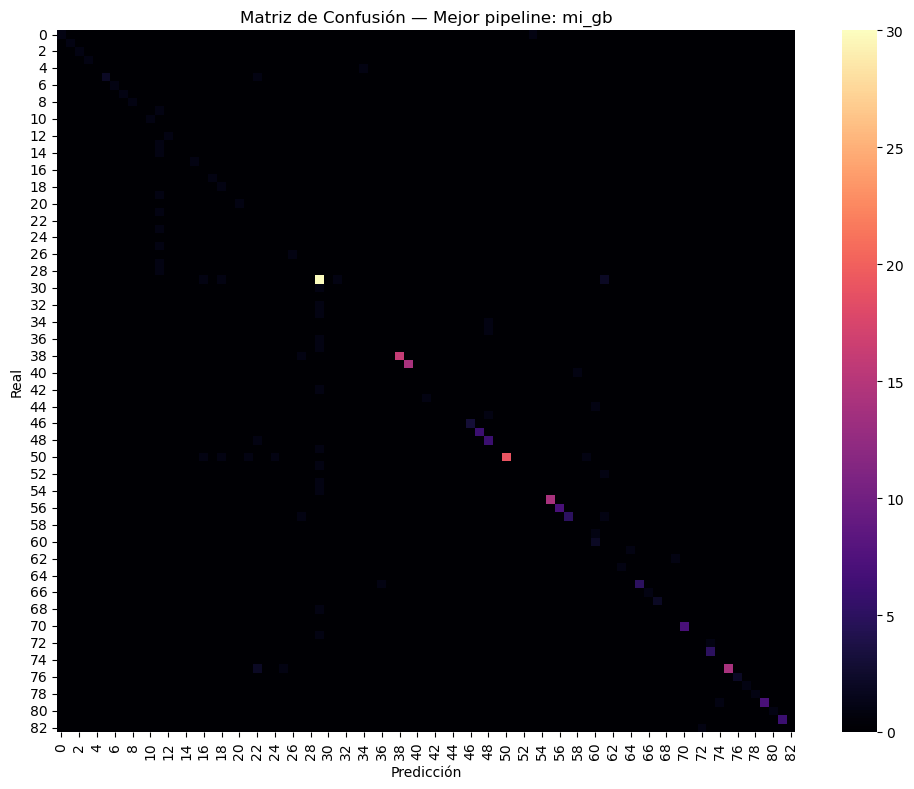

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif, SelectFromModel

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score
from copy import deepcopy

# -------------------------------------------------------
# 1. Configuración general

RANDOM_STATE = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# -------------------------------------------------------
# 2. Definición de pipelines

pipelines = {
    "pca_svc": Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=15)),
        ("clf", SVC(kernel='rbf', C=1))
    ]),
    "pca_logreg": Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=15)),
        ("clf", LogisticRegression(max_iter=2000))
    ]),
    "pca_knn": Pipeline([
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components=15)),
        ("clf", KNeighborsClassifier(n_neighbors=5))
    ]),
    "mi_gb": Pipeline([
        ("scaler", StandardScaler()),
        ("mi", SelectKBest(mutual_info_classif, k=15)),
        ("clf", GradientBoostingClassifier(random_state=RANDOM_STATE))
    ]),
    "treesel_svc": Pipeline([
        ("scaler", StandardScaler()),
        ("sel", SelectFromModel(ExtraTreesClassifier(
            n_estimators=400, random_state=RANDOM_STATE, n_jobs=-1))),
        ("clf", SVC(kernel='rbf', C=1))
    ]),
}

# -------------------------------------------------------
# 3. Entrenamiento y evaluación de cada pipeline

resultados = []

for name, base_pipe in pipelines.items():
    print(f"\nEvaluación rápida → {name}")
    pipe = deepcopy(base_pipe)

    # Validación cruzada (solo train)
    scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1)
    acc_cv = np.mean(scores)

    # Entrenamiento final y evaluación en test
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc_test = accuracy_score(y_test, y_pred)

    print(f"CV acc:   {acc_cv:.3f} ± {np.std(scores):.3f}")
    print(f"Test acc: {acc_test:.3f}")
    print("\nReporte de clasificación (test):\n",
          classification_report(y_test, y_pred, zero_division=0))

    resultados.append({
        "modelo": name,
        "cv_acc": acc_cv,
        "test_acc": acc_test,
        "best_estimator": pipe
    })

# -------------------------------------------------------
# 4. Resultados comparativos

res_df = pd.DataFrame([{k: v for k, v in r.items() if k in ["modelo", "cv_acc", "test_acc"]} for r in resultados])
res_df = res_df.sort_values("test_acc", ascending=False).reset_index(drop=True)
print("\nComparativa de accuracy:")
print(res_df)

# Mejor modelo
best = max(resultados, key=lambda r: r["test_acc"])
best_est = best["best_estimator"]
print(f"\nMejor pipeline: {best['modelo']} | test_acc={best['test_acc']:.3f}")

# -------------------------------------------------------
# 5. Matriz de confusión del mejor modelo

y_pred_best = best_est.predict(X_test)
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_matrix(y_test, y_pred_best),
    cmap="magma",
    cbar=True
)
plt.title(f"Matriz de Confusión — Mejor pipeline: {best['modelo']}")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

